In [1]:
from torchvision import datasets, transforms
from cub200_2011_dataset import CUB2011_BubbleDataset
from utils import PairedTransforms, ResizePair, RandomHorizontalFlipPair, RandomCropPair

In [2]:
# 画像とバブル画像に適用するTransform
paired_transform = PairedTransforms(
RandomHorizontalFlipPair(p=0.5),
ResizePair(transforms.Resize((224, 224))),
RandomCropPair(size=179)#, padding=4)
# 他のペアで適用するTransformを追加可能
)

# 画像用のTransform
img_transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.Normalize((0.4817, 0.4974, 0.4319), (0.2297, 0.2256, 0.2655)),  # 画像にはNormalizeを適用
])
        
# バブル画像用のTransform (Normalizeなし)
bubble_transform = transforms.Compose([
    transforms.Resize((14, 14)),
    transforms.Grayscale(num_output_channels=1),  # 3チャンネルから1チャンネルのグレースケールに変換
])

In [3]:
dataset = CUB2011_BubbleDataset(json_path = './cub200_2011_dataset.json', 
                                images_dir_path = "/taiga/Datasets/CUB_200_2011/images", 
                                bubble_dir_path = "/taiga/Datasets/CUB_GHA", 
                                split='train', 
                                img_transform=img_transform, 
                                bubble_transform=bubble_transform, 
                                paired_transform=paired_transform,
                                )

In [4]:
inputs, targets, bubbles = dataset[0]

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.0850425..2.1694403].


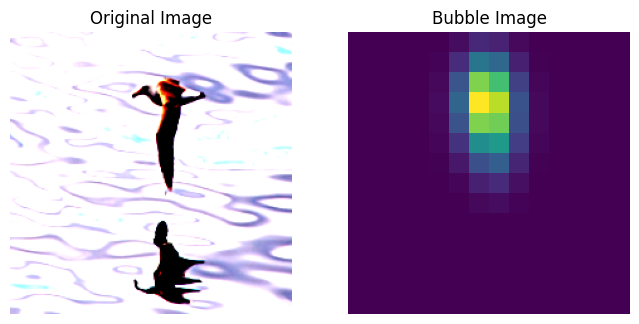

In [20]:
import matplotlib.pyplot as plt

img, label, bubble_img = dataset[55]

# 画像を表示する
plt.figure(figsize=(8, 4))

# 元の画像を左側に表示
plt.subplot(1, 2, 1)
plt.imshow(img.permute(1, 2, 0))  # (C, H, W) -> (H, W, C)
plt.title("Original Image")
plt.axis('off')

# バブル画像を右側に表示
plt.subplot(1, 2, 2)
plt.imshow(bubble_img.permute(1, 2, 0))  # (C, H, W) -> (H, W, C)
plt.title("Bubble Image")
plt.axis('off')

plt.show()